In [1]:
import platform
print(platform.platform())

macOS-14.0-arm64-arm-64bit


In [77]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score


#randomfores
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

#ann training
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsolutePercentageError

from tensorflow.keras.metrics import mean_absolute_percentage_error
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import SGD,Adam



sns.set(style = 'whitegrid')

import warnings
warnings.filterwarnings("ignore")

import os
path = os.getcwd()
path = path.replace('notebooks', '')
os.chdir(path)


In [3]:
df = pd.read_csv("./data/raw/dataset.csv")

In [4]:
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

- There are a lot of missing values

In [6]:
df.describe(include='all')

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,197428,197421,197428,192668,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
unique,NaN,180985,178110,6743,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-02-11 19:50:43,2015-02-11 20:40:45,d43ab110ab2489d6b9b2caa394bf920f,american,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,5,937,19399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.978706,NaN,NaN,NaN,NaN,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,NaN,NaN,NaN,NaN,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,NaN,NaN,NaN,NaN,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,NaN,NaN,NaN,NaN,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000


### Feature engineering
We have the time at which the order was placed and time at which it was delivered, so we will create a new column for time taken in delivery and that will be our target column

Calculating time taken in delivery by subtracting the order timestamp from delivery timestamp

The time stamps that we have now are in object format and need to be convertd to datetime format for easily working with them as intended. The pandas datetime function checks if the data is in correct format for it and also understands the order of the data and converts accordingly

In [7]:
df['created_at']=pd.to_datetime(df['created_at'])
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])

In [8]:
# Dependent variable
df['time_taken']=df['actual_delivery_time'] - df['created_at']


- Now that we have our time taken for the delivery we can convert it to minutes and that will be our target variable to train the models

- The timedelta is a datatype that stores the time difference and it is better we convert it to float and converting to minute does that as well

In [9]:
df['time_taken_mins']=pd.to_timedelta(df['time_taken'])/pd.Timedelta('60s')

In [10]:
# Extracting hour and day of week from the data
df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek

# Looking for the null data

In [11]:
(df.isnull().sum()/len(df))*100

market_id                   0.499929
created_at                  0.000000
actual_delivery_time        0.003546
store_id                    0.000000
store_primary_category      2.411006
order_protocol              0.503981
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.236927
total_busy_partners         8.236927
total_outstanding_orders    8.236927
time_taken                  0.003546
time_taken_mins             0.003546
hour                        0.000000
day                         0.000000
dtype: float64

In [12]:

# Dealing with missing numerical values

df['total_onshift_partners'] = df.groupby(['market_id'])['total_onshift_partners'].transform(lambda x: x.fillna(x.mean()))
df['total_busy_partners'] = df.groupby(['market_id'])['total_busy_partners'].transform(lambda x: x.fillna(x.mean()))
df['total_outstanding_orders'] = df.groupby(['market_id'])['total_outstanding_orders'].transform(lambda x: x.fillna(x.mean()))

In [13]:
## Imputing store primary category by store level mode
df['store_primary_category'] = df.groupby('store_id')['store_primary_category'].transform(lambda x: x.fillna(x.value_counts().index[0]) if not x.isna().all() else np.nan)

In [14]:
(df.isnull().sum()/len(df))*100

market_id                   0.499929
created_at                  0.000000
actual_delivery_time        0.003546
store_id                    0.000000
store_primary_category      0.439147
order_protocol              0.503981
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      0.499929
total_busy_partners         0.499929
total_outstanding_orders    0.499929
time_taken                  0.003546
time_taken_mins             0.003546
hour                        0.000000
day                         0.000000
dtype: float64

- Every thing is less .5% we can now dropna the rest of the values

In [15]:
df = df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195062 entries, 0 to 197427
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   market_id                 195062 non-null  float64        
 1   created_at                195062 non-null  datetime64[ns] 
 2   actual_delivery_time      195062 non-null  datetime64[ns] 
 3   store_id                  195062 non-null  object         
 4   store_primary_category    195062 non-null  object         
 5   order_protocol            195062 non-null  float64        
 6   total_items               195062 non-null  int64          
 7   subtotal                  195062 non-null  int64          
 8   num_distinct_items        195062 non-null  int64          
 9   min_item_price            195062 non-null  int64          
 10  max_item_price            195062 non-null  int64          
 11  total_onshift_partners    195062 non-null  float64       

In [17]:
num_cols = ['total_items' , 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price' , 'total_onshift_partners', 
            'total_busy_partners' , 'total_outstanding_orders']
cat_cols = ['market_id', 'store_id','order_protocol',  'store_primary_category', 'hour', 'day']
target = 'time_taken_mins'

In [30]:
df['market_id'].astype('str')

0         1.0
1         2.0
2         3.0
3         3.0
4         3.0
         ... 
197423    1.0
197424    1.0
197425    1.0
197426    1.0
197427    1.0
Name: market_id, Length: 195062, dtype: object

In [31]:
for col in cat_cols:
    df['col'] = df[col].astype('str')

In [32]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_mins,hour,day
count,195062.000000,195062.000000,195062.000000,195062.000000,195062.000000,195062.00000,195062.000000,195062.000000,195062.000000,195062.000000,195062.000000,195062.000000,195062.000000
mean,2.978007,2.886046,3.195625,2681.291523,2.670295,685.99575,1159.195912,44.683894,41.627842,57.876166,48.465984,8.469389,3.220048
std,1.524786,1.503345,2.668753,1822.707251,1.630225,521.48532,557.620115,33.178059,30.894399,50.606539,322.418476,8.659129,2.045591
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.683333,0.000000,0.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.00000,800.000000,18.847580,17.000000,19.000000,35.066667,2.000000,1.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.00000,1095.000000,40.000000,38.000000,46.000000,44.333333,3.000000,3.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.00000,1395.000000,62.000000,60.000000,80.000000,56.350000,19.000000,5.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.00000,14700.000000,171.000000,154.000000,285.000000,141947.650000,23.000000,6.000000


In [19]:
# dealing with negative value - coverting everything to positive values
for col in num_cols:
    df.loc[df[col]<0, col] = df.loc[df[col]<0, col]*-1

In [20]:
df.describe()

,market_id,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken,time_taken_mins,hour,day
count,195062.000000,195062,195062,195062.000000,195062.000000,195062.000000,195062.000000,195062.00000,195062.000000,195062.000000,195062.000000,195062.000000,195062,195062.000000,195062.000000,195062.000000
mean,2.978007,2015-02-04 21:59:02.084337664,2015-02-04 22:47:30.043391232,2.886046,3.195625,2681.291523,2.670295,685.99575,1159.195912,44.683894,41.627842,57.876166,0 days 00:48:27.959054044,48.465984,8.469389,3.220048
min,1.000000,2014-10-19 05:24:15,2015-01-21 15:58:11,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0 days 00:01:41,1.683333,0.000000,0.000000
25%,2.000000,2015-01-29 02:31:36,2015-01-29 03:21:21.249999872,1.000000,2.000000,1400.000000,1.000000,299.00000,800.000000,18.847580,17.000000,19.000000,0 days 00:35:04,35.066667,2.000000,1.000000
50%,3.000000,2015-02-05 03:30:27,2015-02-05 04:41:39.500000,3.000000,3.000000,2200.000000,2.000000,595.00000,1095.000000,40.000000,38.000000,46.000000,0 days 00:44:20,44.333333,3.000000,3.000000
75%,4.000000,2015-02-12 01:39:32.249999872,2015-02-12 02:25:47,4.000000,4.000000,3395.000000,3.000000,949.00000,1395.000000,62.000000,60.000000,80.000000,0 days 00:56:21,56.350000,19.000000,5.000000
max,6.000000,2015-02-18 06:00:44,2015-02-19 22:45:31,7.000000,411.000000,27100.000000,20.000000,14700.00000,14700.000000,171.000000,154.000000,285.000000,98 days 13:47:39,141947.650000,23.000000,6.000000
std,1.524786,NaN,NaN,1.503345,2.668753,1822.707251,1.630225,521.48532,557.620115,33.178059,30.894399,50.606539,0 days 05:22:25.108589135,322.418476,8.659129,2.045591


In [21]:
df = df.drop(['created_at', 'actual_delivery_time', 'time_taken'], axis=1)

In [22]:
df

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_mins,hour,day
0,1.0,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
2,3.0,f0ade77b43923b38237db569b016ba25,mexican,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,20,3
3,3.0,f0ade77b43923b38237db569b016ba25,mexican,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,21,1
4,3.0,f0ade77b43923b38237db569b016ba25,mexican,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.116667,0,1
197424,1.0,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.383333,0,4
197425,1.0,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.133333,4,5
197426,1.0,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.116667,18,6


# Univariate analysis

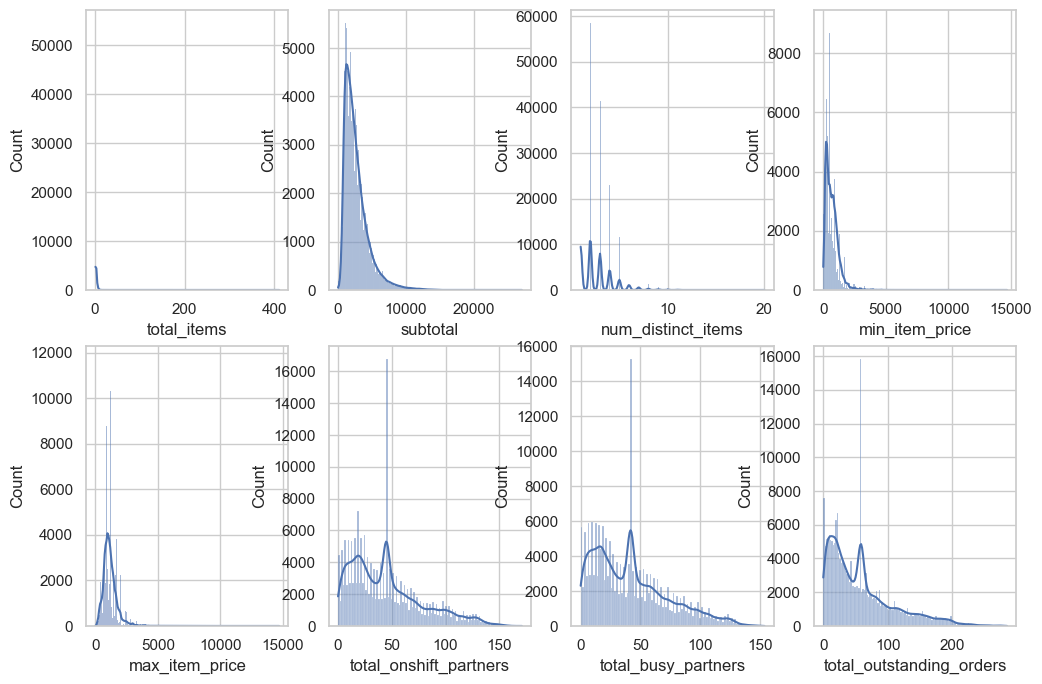

In [24]:
# check distribution of each numerical variable
rows, cols = 2,4
fig, axs = plt.subplots(rows,cols, figsize=(12, 8))
index = 0
for row in range(rows):
    for col in range(cols):
        sns.histplot(df[num_cols[index]], kde=True, ax=axs[row,col])
        index += 1
        
plt.show()

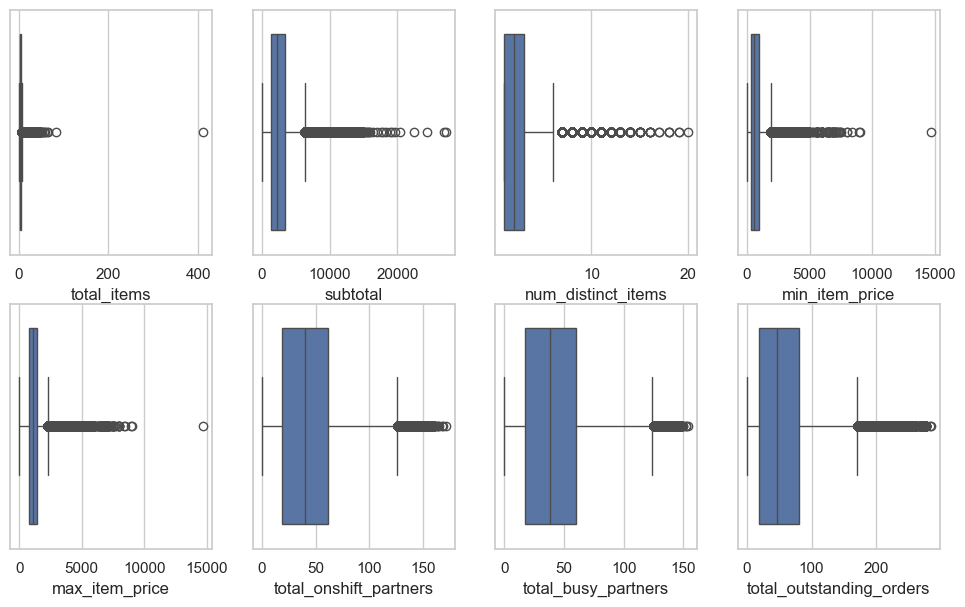

In [29]:
# check for outliers using boxplots
rows, cols = 2, 4
fig, axs = plt.subplots(rows, cols, figsize=(12, 7))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.boxplot(x=num_cols[index], data=df, ax=axs[row,col])
        index += 1
    
plt.show()

There are outliers in Univariate analysis
- Not doing anything for it yet

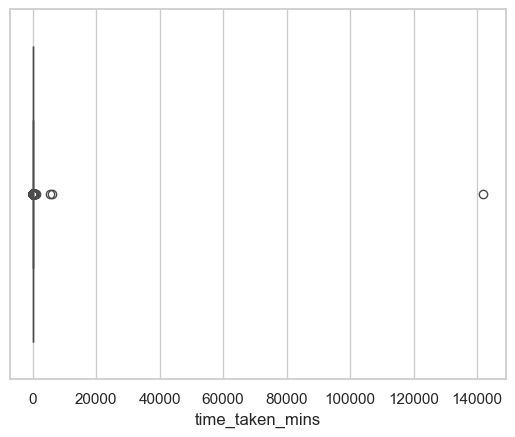

In [42]:
sns.boxplot(x=target, data=df)
plt.show()

In [49]:
# removing outliers in target variable
df= df[df['time_taken_mins']<1000]

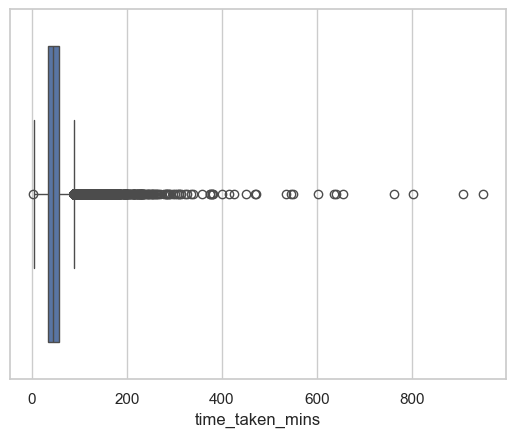

In [46]:
sns.boxplot(x=target, data=df)
plt.show()

In [33]:
# check unique values in categorical variables
for col in cat_cols:
    print("Column:  {:18}   Unique values: {}".format(col, df[col].nunique()))


Column:  market_id            Unique values: 6
Column:  store_id             Unique values: 6567
Column:  order_protocol       Unique values: 7
Column:  store_primary_category   Unique values: 74
Column:  hour                 Unique values: 19
Column:  day                  Unique values: 7


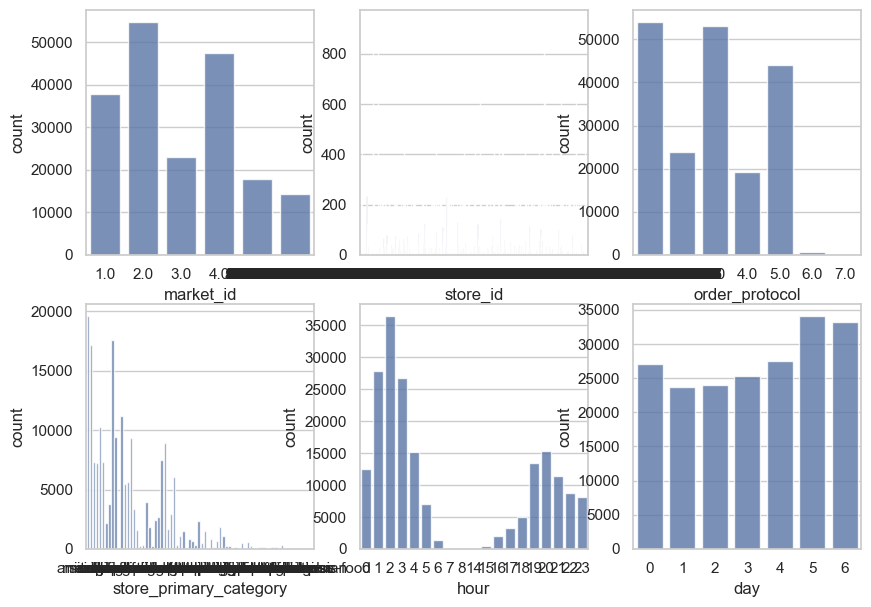

In [35]:
# countplots for categorical variables
cols, rows = 3, 2
fig, axs = plt.subplots(rows, cols, figsize=(10, 7))


index = 0
for row in range(rows):
    for col in range(cols):
        if index< len(cat_cols):
            sns.countplot(x=cat_cols[index], data=df, ax=axs[row, col], alpha=0.8)
            index += 1
        else:
            continue
        
        
plt.show()

# Bivariate analysis

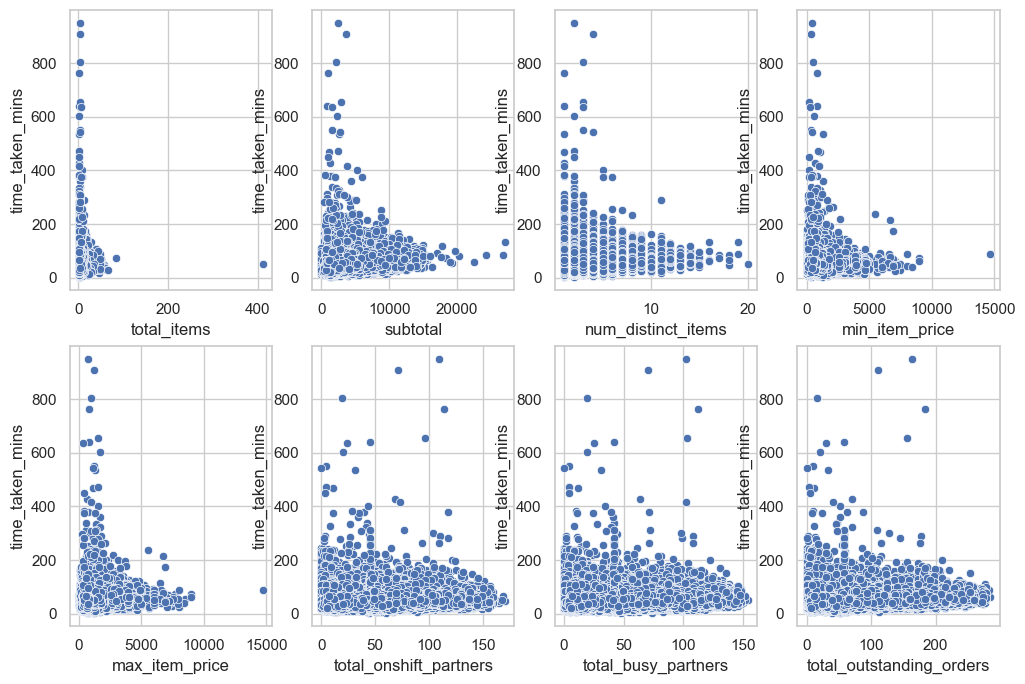

In [47]:
# check distribution of each numerical variable
rows, cols = 2,4
fig, axs = plt.subplots(rows,cols, figsize=(12, 8))
index = 0
for row in range(rows):
    for col in range(cols):
        sns.scatterplot(x=num_cols[index], y=target, data=df, ax=axs[row, col])
        index += 1
        
plt.show()

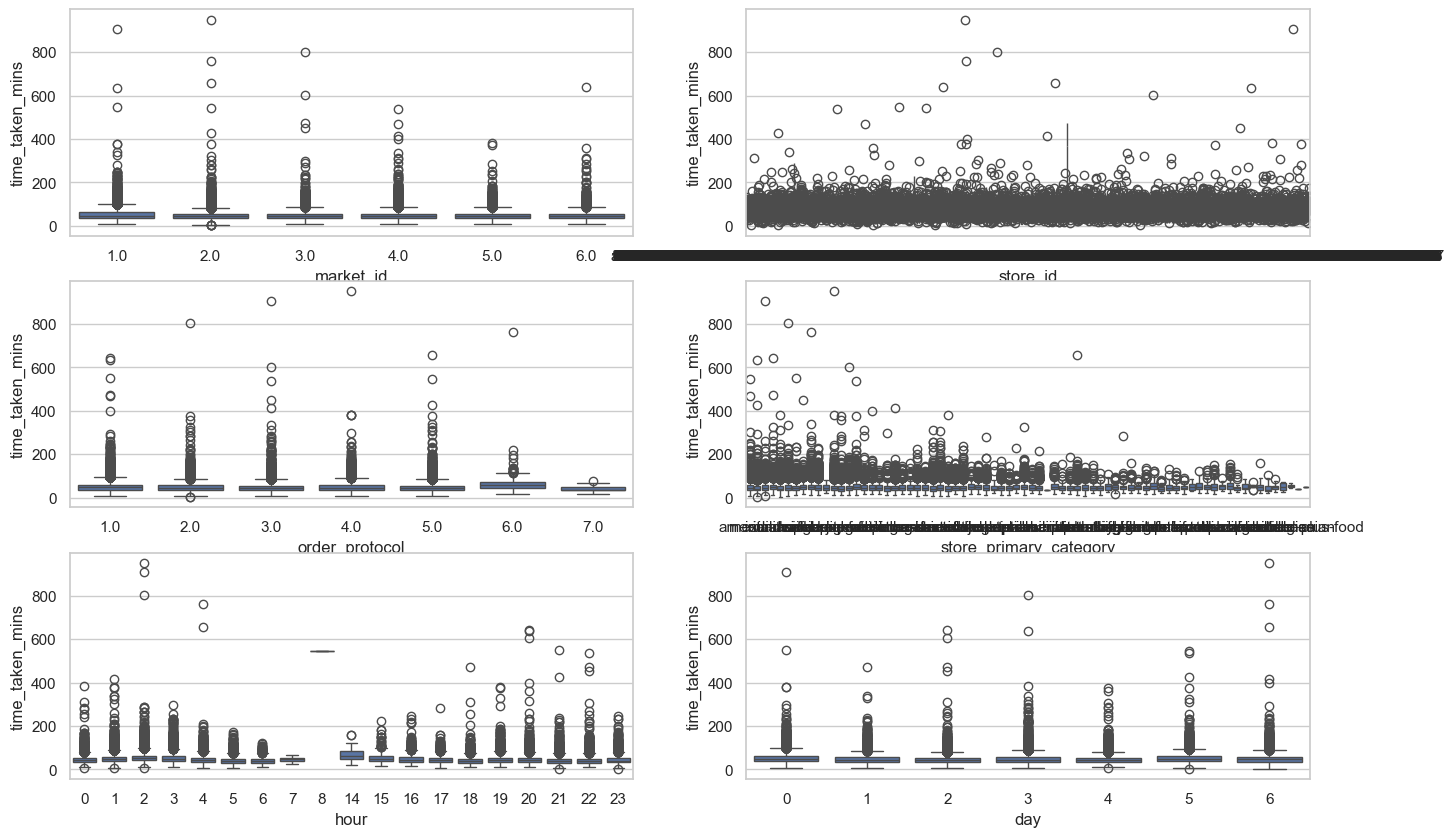

In [48]:
rows, cols = 3,2
fig, axs = plt.subplots(rows, cols, figsize=(16,10))

index = 0
for row in range(rows):
    for col in range(cols):
        if index< len(cat_cols):
            sns.boxplot(x=cat_cols[index], y=target, data=df, ax=axs[row,col])
        
            index += 1
        else:
            continue
plt.show()

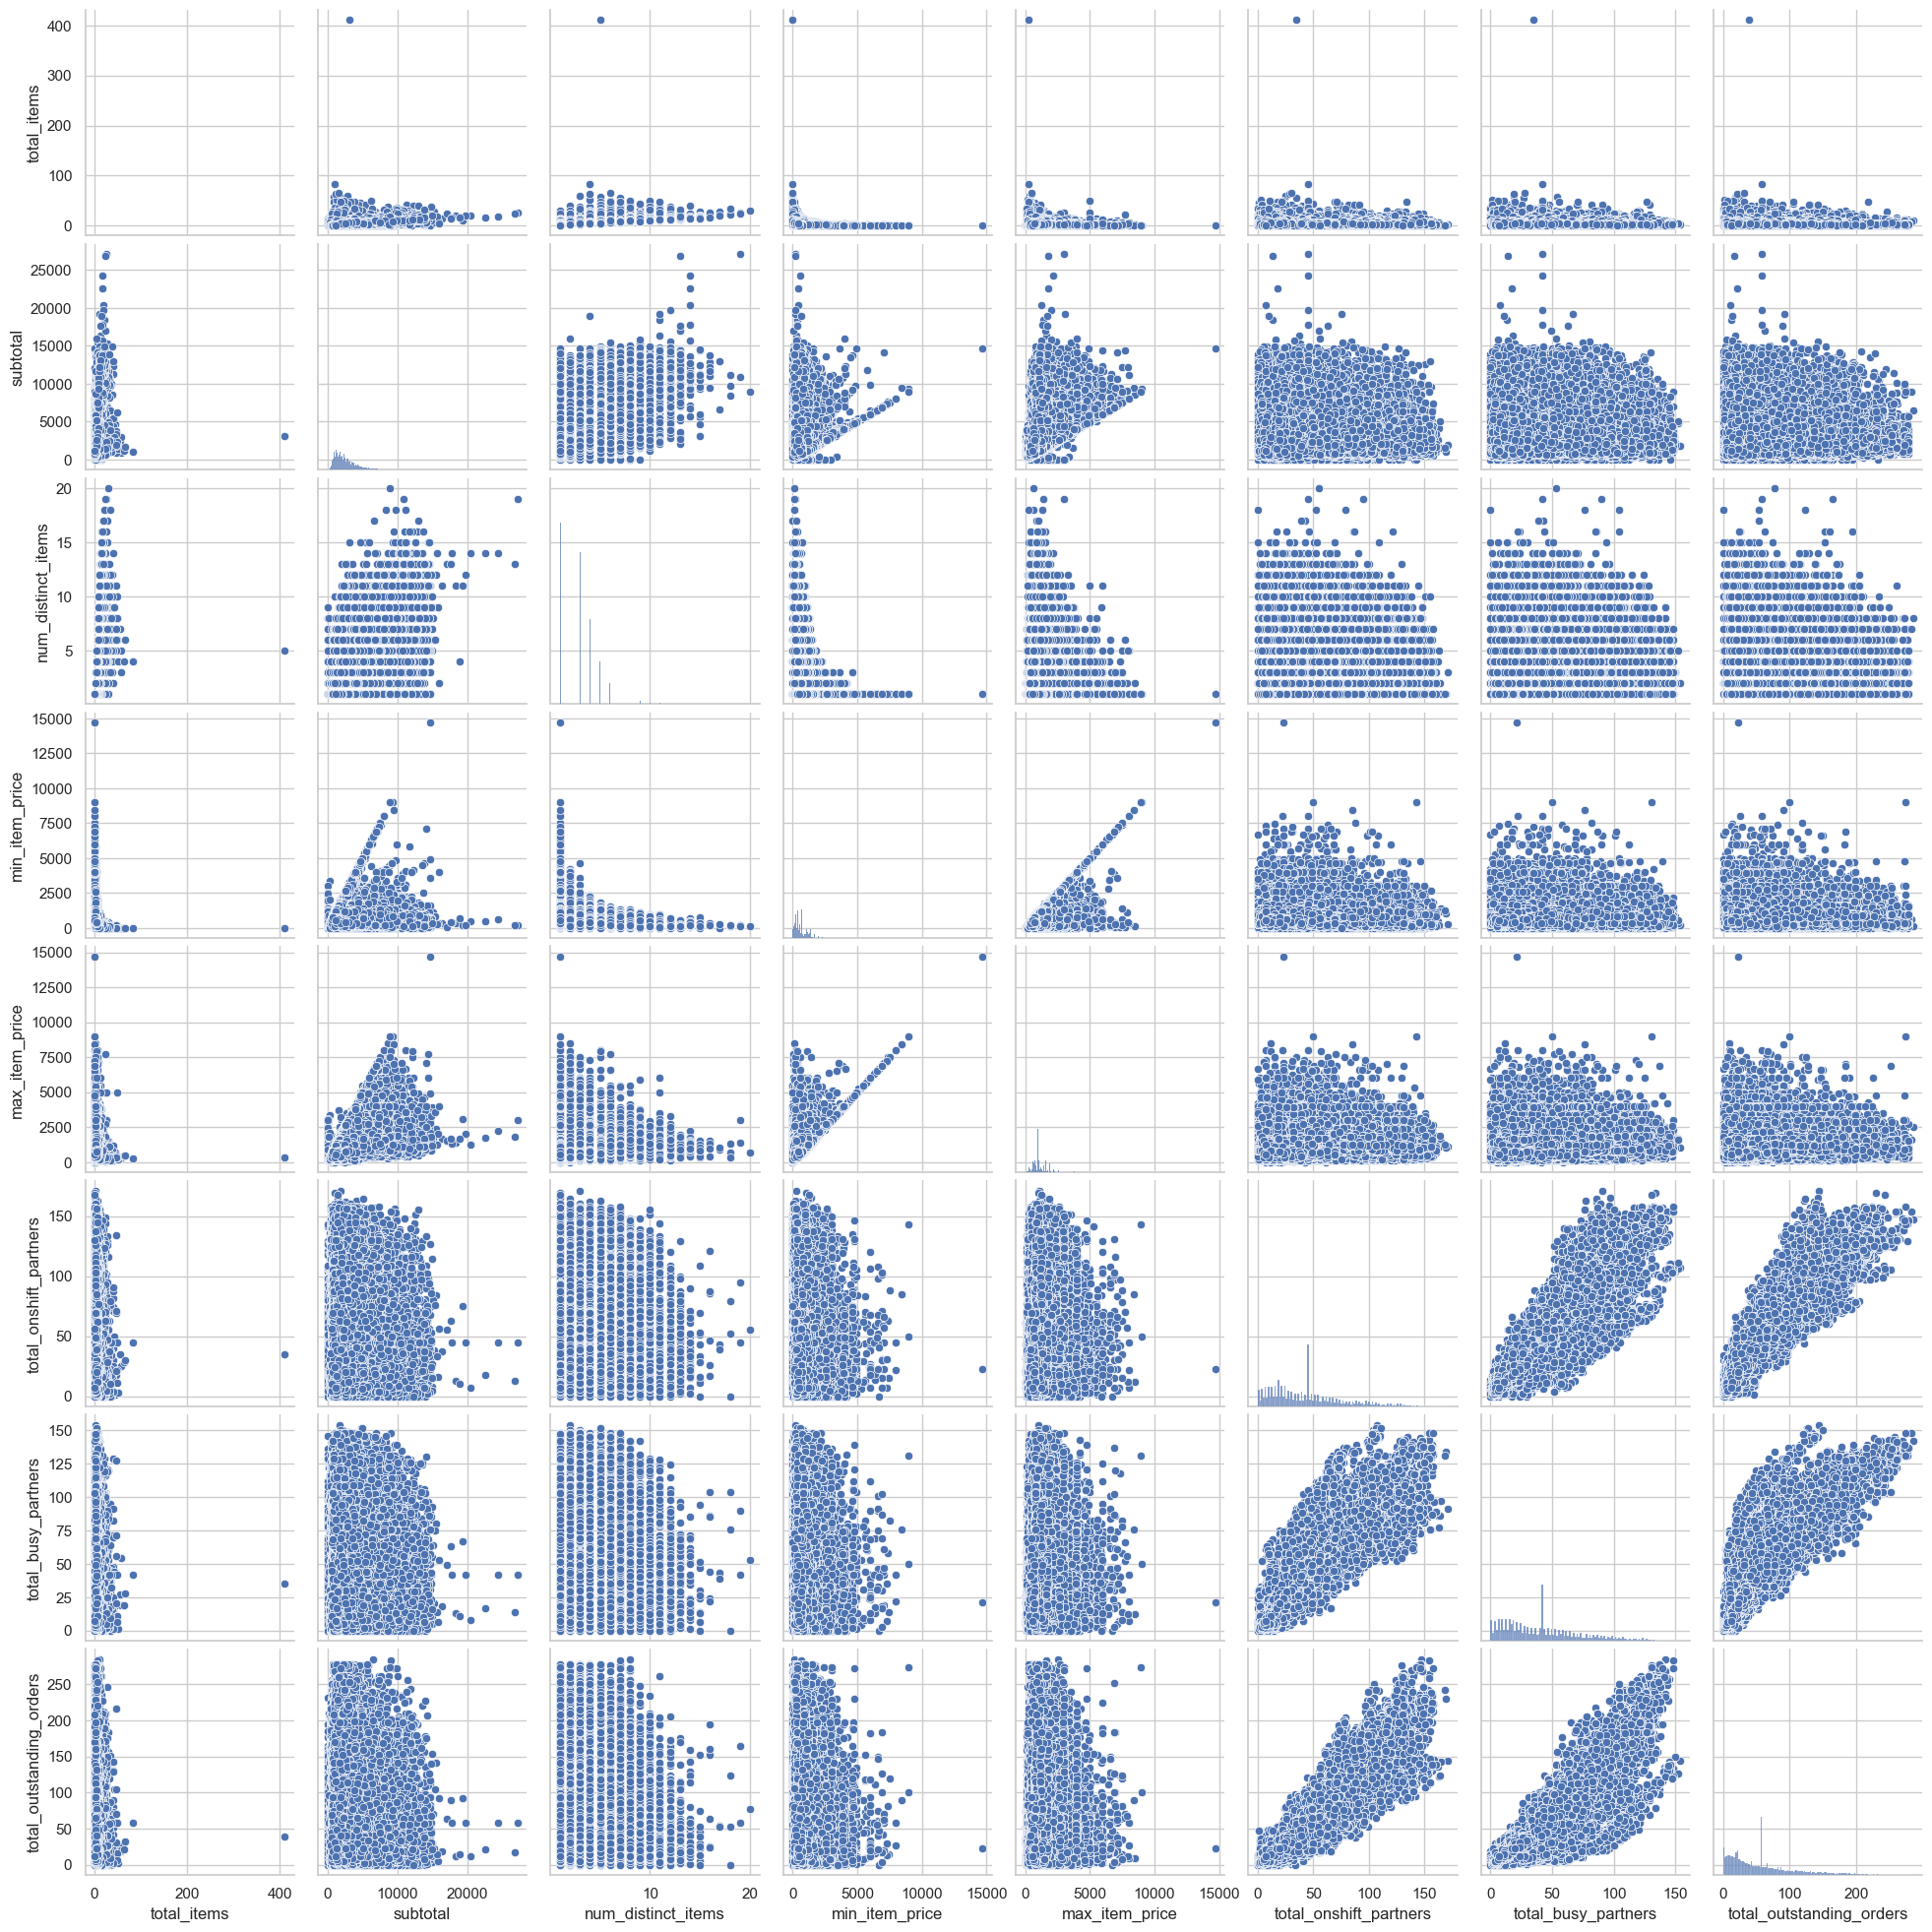

In [50]:
sns.pairplot(df[num_cols])
plt.show()

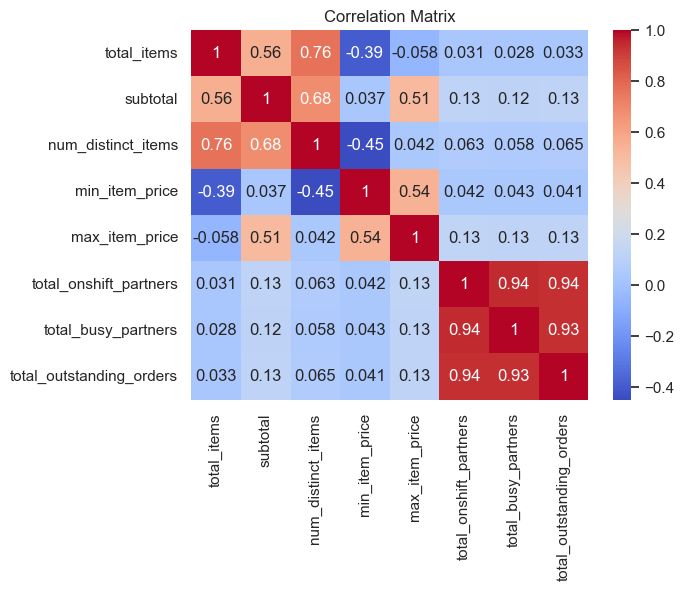

In [53]:
corr_matrix = df[num_cols].corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [54]:
features = num_cols + cat_cols
features

['total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders',
 'market_id',
 'store_id',
 'order_protocol',
 'store_primary_category',
 'hour',
 'day']

In [55]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.2,
    random_state=42)

In [56]:
cat_cols

['market_id',
 'store_id',
 'order_protocol',
 'store_primary_category',
 'hour',
 'day']

In [89]:
ohe_cols = ['market_id', 'order_protocol']
te_cols = [ 'store_id', 'store_primary_category', 'hour', 'day']

In [90]:
import category_encoders

In [91]:

# Bundle preprocessing for numerical and categorical data
preprocessing = ColumnTransformer(
    transformers=[
       ('target_enc', category_encoders.target_encoder.TargetEncoder(), te_cols),
        ('onehot', OneHotEncoder(drop ='first', sparse_output=False, handle_unknown='ignore'), ohe_cols),
        ('standard', StandardScaler(),num_cols )
     ])
preprocessing


ColumnTransformer(transformers=[('target_enc', TargetEncoder(),
                                 ['store_id', 'store_primary_category', 'hour',
                                  'day']),
                                ('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['market_id', 'order_protocol']),
                                ('standard', StandardScaler(),
                                 ['total_items', 'subtotal',
                                  'num_distinct_items', 'min_item_price',
                                  'max_item_price', 'total_onshift_partners',
                                  'total_busy_partners',
                                  'total_outstanding_orders'])])

In [92]:
model = xgb.XGBRFRegressor(n_jobs=-1, verbosity = 1)

In [98]:
my_pipeline = Pipeline(steps=[('preprocessing', preprocessing),
                              ('model', model)
                             ])

hyperparameter_grid = {
    'model__n_estimators': [1000],
    'model__max_depth': [12]
}

In [103]:
# Bundle preprocessing and modeling code in a pipeline



random_cv = RandomizedSearchCV(estimator=my_pipeline,
            param_distributions=hyperparameter_grid,
            cv=3, 
            n_iter= 10,           
            n_jobs = -1,
            verbose = 2,
            refit= 'mae',
            return_train_score = True,
            random_state=42)
random_cv.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .......model__max_depth=10, model__n_estimators=100; total time=   5.9s
[CV] END ........model__max_depth=5, model__n_estimators=100; total time=   2.6s
[CV] END .......model__max_depth=10, model__n_estimators=300; total time=  10.3s
[CV] END ........model__max_depth=5, model__n_estimators=100; total time=   2.6s
[CV] END .......model__max_depth=10, model__n_estimators=100; total time=   5.4s
[CV] END ........model__max_depth=5, model__n_estimators=100; total time=   2.8s
[CV] END .......model__max_depth=10, model__n_estimators=100; total time=   5.9s
[CV] END .......model__max_depth=10, model__n_estimators=500; total time=  19.5s
[CV] END ......model__max_depth=10, model__n_estimators=1200; total time= 1.0min
[CV] END ......model__max_depth=12, model__n_estimators=1000; total time= 1.5min
[CV] END .......model__max_depth=15, model__n_estimators=500; total time= 1.7min
[CV] END .......model__max_depth=12, model__n_esti

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('target_enc',
                                                                               TargetEncoder(),
                                                                               ['store_id',
                                                                                'store_primary_category',
                                                                                'hour',
                                                                                'day']),
                                                                              ('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['market_id',
                                                                                'order_protocol']),
                                                                              ('standard',
                                                                               StandardScaler(),
                                                                               ['total_items',
                                                                                'subtotal',...
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=-1,
                                                             num_parallel_tree=None,
                                                             objective='reg:squarederror',
                                                             random_state=None,
                                                             reg_alpha=None, ...))]),
                   n_jobs=-1,
                   param_distributions={'model__max_depth': [12],
                                        'model__n_estimators': [1000]},
                   random_state=42, refit='mae', return_train_score=True,
                   verbose=2)

In [104]:
random_cv.best_params_

{'model__n_estimators': 1000, 'model__max_depth': 12}

In [105]:
prediction=random_cv.predict(X_test)
mse=mean_squared_error(y_test,prediction)
rmse=mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
mae=mean_absolute_error(y_test,prediction)
print("mase : ",mae)

mse :  303.6811776150507
rmse :  17.426450516816402
mase :  11.40426108832157


In [106]:
r2_score(y_test,prediction)

0.22819813158518554